# Handwritten Digit Recognition using MNIST

This project aims to build a simple neural network to recognize handwritten digits using the MNIST dataset.  
MNIST is a widely used dataset in machine learning, containing 60,000 training images and 10,000 test images of handwritten digits (0-9).  
 


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Loading the MNIST Dataset

The MNIST dataset consists of grayscale images of handwritten digits, each of size **28x28 pixels**.  
It is preloaded in TensorFlow/Keras and can be accessed using `keras.datasets.mnist`.  

### **Dataset Structure:**
- `train_images`: A NumPy array of shape **(60000, 28, 28)** containing **60,000 training images**.
- `train_labels`: A NumPy array of shape **(60000,)** containing labels (**digits 0-9**) for training images.
- `test_images`: A NumPy array of shape **(10000, 28, 28)** containing **10,000 test images**.
- `test_labels`: A NumPy array of shape **(10000,)** containing labels for the test images.


4


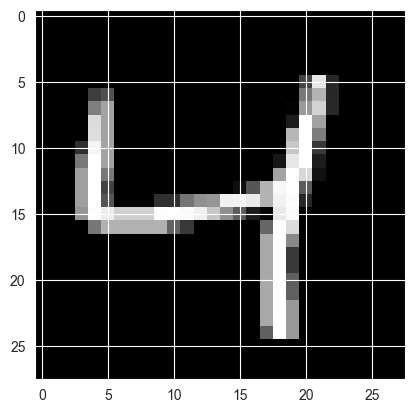

In [3]:
# Load the MNIST Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show sample image
img_num = 2
plt.imshow(x_train[img_num], cmap='gray')
print(y_train[img_num])

## **Normalization of Pixels**
Neural networks perform better when input values are in a **small, consistent range**.  
Moreover, since MNIST images have pixel values between **0 and 255**, we normalize 
them by dividing by **255.0**, scaling them to the range **[0,1]**:

Example:
- A pixel value of **0** (black) becomes **0.0**  
- A pixel value of **128** (gray) becomes **0.502**  
- A pixel value of **255** (white) becomes **1.0**   

In [4]:
# Normalize pixels for better training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the image
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

## Building the Neural Network Model  

To recognize handwritten digits, we need a neural network that can process the **28x28 pixel images** and classify them into one of **10 digits (0-9)**.  
In this case, we will build a convolutional neural network.


In [5]:
# Build the model
model = keras.Sequential([
    # Convolutional Layer

    # Learn 32 filters using 3x3 kernel
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),

    # Max-pooling Layer: Pool the max of each 2x2 grid in the image
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten units into one single layer
    tf.keras.layers.Flatten(),


    # Neural Network Layer

    # Add a hidden layer with 50% dropout
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model 
model.fit(x_train, y_train, epochs=10)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {test_acc * 100}")


D:\PremieraAlpha\College\3rd_Year-Second Semester\CS346 F2 Intelligent Systems 2\Learn Artificial Intelligence\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8602 - loss: 0.4529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9637 - loss: 0.1157
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9752 - loss: 0.0856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9780 - loss: 0.0727
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9815 - loss: 0.0582
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9849 - loss: 0.0480
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9866 - loss: 0.0427
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9880 - loss: 0.0382
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 10ms/step - accuracy: 0.9898 - loss: 0.0330
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9901 - loss: 0.0288
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9833 - loss: 0.0539
Accuracy: 98.72000217437

## Make Predictions

We will now predict the images using our model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


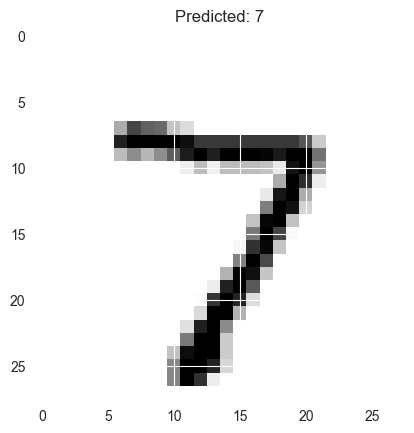

In [6]:
# choose the number of image to predicted
img_num = 0

# get the image and prediction
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[img_num])

# get all predicted labels
predicted_labels = [np.argmax(i) for i in predictions]

# make a plot of the predictions
plt.imshow(x_test[img_num], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()

## Show Report of the Predictions

This code generates a **confusion matrix** to evaluate the model’s performance. It compares true labels (`y_test`) 
with predicted labels (`predicted_labels`) and visualizes the results using a **Seaborn heatmap**. 
The matrix helps identify correct and incorrect predictions.


Text(95.72222222222221, 0.5, 'Truth')

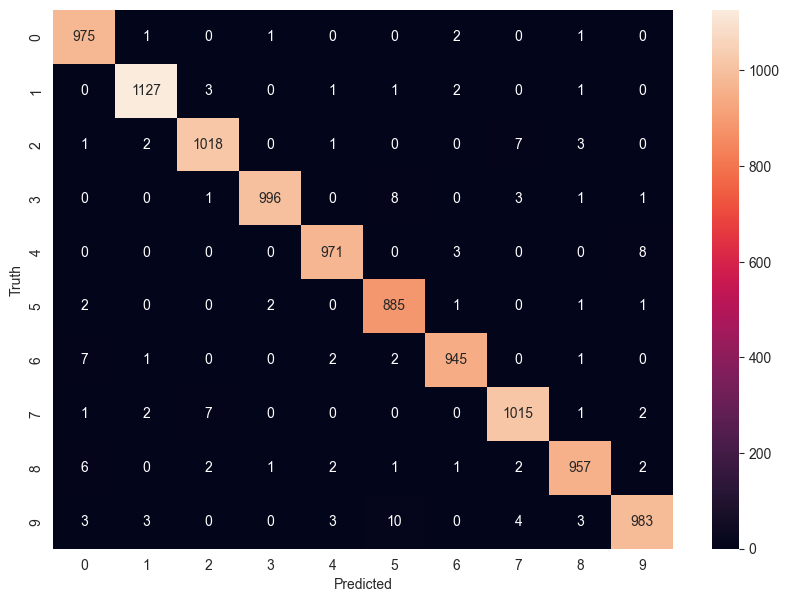

In [7]:
import seaborn as sn

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')